# CNN with Tensorflow and Keras

### Step 1-Importing Dependencies

In [8]:
import tensorflow as tf
import os

In [10]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

### Step -2Building Model

In [11]:
# Dependencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

In [12]:
# Defining Network
model = Sequential()

In [13]:
# creating layers
model.add(Conv2D(16,1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(30,1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(20,1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(250,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [19]:
# compiling miodel
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [22]:
# Training model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./256)

train_generator = train_datagen.flow_from_directory(
        'data/training',
        target_size=(256, 256),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        'data/testing',
        target_size=(256, 256),
        batch_size=32,
        class_mode='binary')

hist = model.fit_generator(
               train_generator,
               epochs=50,
               validation_data=validation_generator,
               validation_steps=800)

Found 323 images belonging to 2 classes.
Found 187 images belonging to 2 classes.


C:\Users\Muhammad\AppData\Local\Temp\ipykernel_13544\2593793272.py:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/50
11/11 [==============================] - 28s 3s/step - loss: 0.6483 - accuracy: 0.6099
Epoch 2/50
11/11 [==============================] - 24s 2s/step - loss: 0.6399 - accuracy: 0.6347
Epoch 3/50
11/11 [==============================] - 24s 2s/step - loss: 0.6075 - accuracy: 0.7090
Epoch 4/50
11/11 [==============================] - 25s 2s/step - loss: 0.5980 - accuracy: 0.6966
Epoch 5/50
11/11 [==============================] - 23s 2s/step - loss: 0.5961 - accuracy: 0.6842
Epoch 6/50
11/11 [==============================] - 24s 2s/step - loss: 0.5724 - accuracy: 0.7245
Epoch 7/50
11/11 [==============================] - 22s 2s/step - loss: 0.5846 - accuracy: 0.6749
Epoch 8/50
11/11 [==============================] - 24s 2s/step - loss: 0.6410 - accuracy: 0.6378
Epoch 9/50
11/11 [==============================] - 24s 2s/step - loss: 0.5749 - accuracy: 0.7399
Epoch 10/50
11/11 [==============================] - 24s 2s/step - loss: 0.5257 - accuracy: 0.7554
Epoch 11/50
11/11 [

In [25]:
# checking history 
hist.history

{'loss': [0.6482905745506287,
  0.6398901343345642,
  0.6074520349502563,
  0.5980033874511719,
  0.5960885882377625,
  0.5723985433578491,
  0.5845508575439453,
  0.6410006284713745,
  0.5748577117919922,
  0.5257183909416199,
  0.4978024959564209,
  0.5102664232254028,
  0.5018914937973022,
  0.4770296514034271,
  0.45286861062049866,
  0.42661410570144653,
  0.49399474263191223,
  0.47129562497138977,
  0.43859589099884033,
  0.41997256875038147,
  0.4017685353755951,
  0.38496971130371094,
  0.38725343346595764,
  0.4145006239414215,
  0.368201345205307,
  0.4011884331703186,
  0.4115959703922272,
  0.3629828989505768,
  0.35308364033699036,
  0.358821302652359,
  0.3370876610279083,
  0.29616501927375793,
  0.33471226692199707,
  0.2961011826992035,
  0.2723477780818939,
  0.26649871468544006,
  0.23308034241199493,
  0.25468894839286804,
  0.2541294991970062,
  0.2059708535671234,
  0.20320290327072144,
  0.608345091342926,
  0.3725707232952118,
  0.33361196517944336,
  0.3609516

### Step 3-Checking performance 

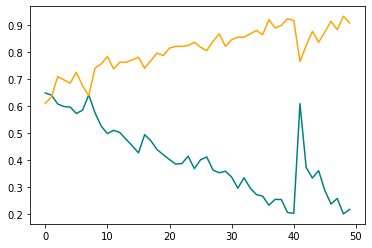

In [37]:
# ploting performance
from matplotlib import pyplot as plt
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['accuracy'],color='orange',label='accuracy')
plt.show()

### Step 4-Prediction

In [26]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [38]:
test_image = image.load_img('data/testing/elon/0x0.jpg') # this is elon pictore
test_image = image.img_to_array(test_image)

In [32]:
import cv2
test_image = cv2.resize(test_image,(256,256))

In [33]:
test_image = np.expand_dims(test_image,axis=0)
pred = model.predict(test_image)
if pred[0][0] == 1:
    print('elon')
else:
    print('jef')

elon
